## 📰 Novelty Detection in News Project

### Introduction
This project aims to develop a novelty detection system applied to sports news. Novelty detection is a machine learning task that identifies new content by comparing it to previously known information.

### 📝 Dataset
We use the **LREC2018 corpus** in the "SPORTS" category, organized by events in subfolders:

- `source` folder: Contains 3 initial articles.
- `target` folder: Contains additional articles labeled as "novel" or "non-novel" in relation to the source articles. These articles will be used to determine if they contain new information (novel) compared to the `source` articles.

### 🔜 Tasks
1. **Novelty Detection**  
   ⚠️ Identify `novel` and `non-novel` news articles by assessing the information in each target article relative to the source articles.

2. **System Development**  
   ⚠️ Develop a system that uses the `source` folder to distinguish between `novel` and `non-novel` information in the new articles within the `target` folder. This involves creating a model that can reliably recognize new information based on content changes detected through `novelty detection algorithms`.

3. **Evaluation and Comparison**  
   ⚠️ Compare the system's results with the `Document Level Annotation (DLA)` attribute in each target article to assess the model’s accuracy using the f1-score. This comparison will validate the system’s ability to label articles accurately as "novel" or "non-novel."


Each article has a `.txt` file with the content and an accompanying `.xml` file containing metadata such as title, publication date, publisher, and other event-related information.



-----

### Libs

In [1]:
from scripts.parser import CorpusParser 
import os
import pandas as pd

base_dir = os.getcwd()
corpus_dir = os.path.join(base_dir, 'database', 'TAP-DLND-1.0_LREC2018')

parser = CorpusParser(corpus_dir)
df_news = parser.parse()


In [2]:
from tabulate import tabulate
print(tabulate(df_news, headers='keys', tablefmt='psql'))

+----+------------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Structure and Preprocessing news text


**tokenize / remove punctuation and stopwords**

In [3]:
from scripts.tokenize_and_normalize import tokenize_and_remove_punctuation, remove_stopwords

df_news['content_clean_tokenized'] = df_news['content'].apply(tokenize_and_remove_punctuation)
print(df_news['content_clean_tokenized'].iloc[0])

First 10 stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Currently', 'reading', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Baba', 'Ramdev', 'Wrestling', 'Yoga', 'guru', 'Ramdev', 'will', 'challenge', 'the', 'Olympic', 'for', 'a', 'friendly', 'wrestling', 'bout', 'ahead', 'of', 'the', 'second', 'semifinal', 'match', 'between', 'Mumbai', 'Maharathi', 'and', 'NCR', 'Punjab', 'Royals', 'in', 'the', 'Pro', 'Wrestling', 'League', 'The', 'eye', 'turning', 'match', 'is', 'scheduled', 'at', 'pm', 'today', 'in', 'New', 'Delhi', 'Indira', 'Gandhi', 'Indoor', 'Stadium', 'I', 'have', 'fought', 'bouts', 'with', 'national', 'level', 'wrestlers', 'But', 'playing', 'against', 'an', 'internationally', 'r

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Filtrar contenido sin stopwords
df_news['content_no_sw'] = df_news['content_clean_tokenized'].apply(remove_stopwords)
print('the length of the content:',len(df_news['content_clean_tokenized'].iloc[0]))
print('the length after cleaning:',len(df_news['content_no_sw'].iloc[0]))

the length of the content: 244
the length after cleaning: 147


**Lemmatization**
- The goal is to convert words to their base form to standardize the text data. We need the `spacy en_core_web_sm` model to apply the lemmatization function effectively to our corpus.


In [5]:
from scripts.lemmatize_text import lemmatize_text

df_news = lemmatize_text(df_news)
print('ORIGINAL CORPUS:\n',df_news['content'].iloc[0])
print('\nCORPUS CLEANED: \n',df_news['content_no_sw'].iloc[0])

ORIGINAL CORPUS:
 Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Currently reading: Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist #Baba Ramdev , #Wrestling   14:24:22] Yoga guru Ramdev will challenge the 2008 Olympic   for a friendly wrestling bout ahead of the second semifinal match between Mumbai Maharathi and NCR Punjab Royals, in the Pro Wrestling League. 
The eye turning match is scheduled at 6:30 pm today in New Delhi's Indira Gandhi Indoor Stadium. 
“I have fought bouts with national level wrestlers. But playing against an internationally renowned player will be more exciting. You will witness the real power of yoga in this match,” said Ramdev. 
Andrey is   for beating   at the Beijing Olympics. As Andrey reached the finals   
Before the 2nd semifinal on Wednesday, these two will play a friendly bout. Baba Ramdev says he does stamina building exercises daily and when

- After applying all the cleaning strategies, the newly processed corpus shows significant differences. This will enhance our exploratory analysis and improve model performance.


**Feature importance and remove non relevant features** 

In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   event_id                 96 non-null     string
 1   news_id                  96 non-null     string
 2   content                  96 non-null     string
 3   is_source                96 non-null     bool  
 4   DOP                      96 non-null     string
 5   publisher                96 non-null     string
 6   title                    6 non-null      string
 7   eventid                  96 non-null     string
 8   eventname                96 non-null     string
 9   topic                    96 non-null     string
 10  sentence                 96 non-null     Int64 
 11  words                    96 non-null     Int64 
 12  sourceid                 90 non-null     string
 13  DLA                      90 non-null     string
 14  SLNS                     90 non-null     str

In [7]:
from scripts.drop_feature import drop_constant_columns

drop_constant_columns(df_news)

Column 'content_clean_tokenized' was skipped due to unhashable data types.
The following columns were dropped because all values were the same: ['DOP', 'topic']


In [8]:
df_news[:3]

event_id        news_id                                            content  \
0  SPTE001  SPTE001SRC003  Dangal: Baba Ramdev to wrestle it out with Rus...   
1  SPTE001  SPTE001SRC001  Even as the Pro Wrestling League continues, wh...   
2  SPTE001  SPTE001SRC002  
In the ongoing Pro Wrestling League, Haryana ...   

   is_source            publisher  \
0       True  www.indiatvnews.com   
1       True       Indiatimes.com   
2       True       www.news18.com   

                                               title  eventid  \
0  Dangal-Baba Ramdev to wrestle it out with Russ...  SPTE001   
1  Baba Ramdev Calls Out Olympic Wrestling Medall...  SPTE001   
2  Baba Ramdev Challenges Beijing Olympic Medalli...  SPTE001   

                         eventname  sentence  words sourceid   DLA  SLNS  \
0  Baba Ramdev wrestling challenge        13    269     <NA>  <NA>  <NA>   
1  Baba Ramdev wrestling challenge         6     92     <NA>  <NA>  <NA>   
2  Baba Ramdev wrestling challenge        14    267     <NA>  <NA>  <NA>   

                             content_clean_tokenized  \
0  [Dangal, Baba, Ramdev, to, wrestle, it, out, w...   
1  [Even, as, the, Pro, Wrestling, League, contin...   
2  [In, the, ongoing, Pro, Wrestling, League, Har...   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

- Looking at the variavels, its not interesting using the ids and the title beacause just 6 non-null

In [9]:
df_news.drop(columns=['event_id', 'news_id', 'eventid', 'sourceid', 'title'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['content', 'is_source', 'publisher', 'eventname', 'sentence', 'words',
       'DLA', 'SLNS', 'content_clean_tokenized', 'content_no_sw'],
      dtype='object')


- After processing the corpus, it is no longer necessary to use the columns `content_clean_tokenized` and `content`.

In [10]:
df_news.drop(columns=['content_clean_tokenized', 'content'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['is_source', 'publisher', 'eventname', 'sentence', 'words', 'DLA',
       'SLNS', 'content_no_sw'],
      dtype='object')


- But, what's the content of DLA column? 

In [11]:
counts = df_news['DLA'].value_counts(normalize=True) * 100

print("Percentage of each category in the 'DLA' column:")
for category, percentage in counts.items():
    print(f"{category}: {percentage:.2f}%")

Percentage of each category in the 'DLA' column:
Non-Novel: 56.67%
Novel: 43.33%


**Analysis Insight:**

This information is particularly interesting because we can use `DLA` as an identifier to label news as either "Novel" or "Non-Novel." We will train our model using the `source` news as the training set and the `target` news as the test set. Finally, we’ll compare the results to evaluate how well our model identifies the novelty of new items.


In [12]:
df_news[:3]

is_source            publisher                        eventname  sentence  \
0       True  www.indiatvnews.com  Baba Ramdev wrestling challenge        13   
1       True       Indiatimes.com  Baba Ramdev wrestling challenge         6   
2       True       www.news18.com  Baba Ramdev wrestling challenge        14   

   words   DLA  SLNS                                      content_no_sw  
0    269  <NA>  <NA>  dangal baba ramdev wrestle russian olympic med...  
1     92  <NA>  <NA>  pro wrestling league continue draw interest ma...  
2    267  <NA>  <NA>  ongoing pro wrestling league haryana hammers j...

- There are 6 null values in the `SLNS` and `DLA` columns. I will check the correlation to assess their importance and determine the best technique to handle this issue. Options include removing the data, using it for testing, or filling in the missing values.

In [13]:
df_source = df_news[df_news['is_source'] == True]
df_target = df_news[df_news['is_source'] == False]

### Exploratory Analysis

- Visualization of variable distribution
- Principal Component Analysis (PCA)
- Latent Semantics and Topic Modeling
- Correlation between variables
- A temporal analysis was not possible due to the lack of temporal data, so our task will be solely focused on classifying new data in relation to target data.

**Variable Distribution**

6 90


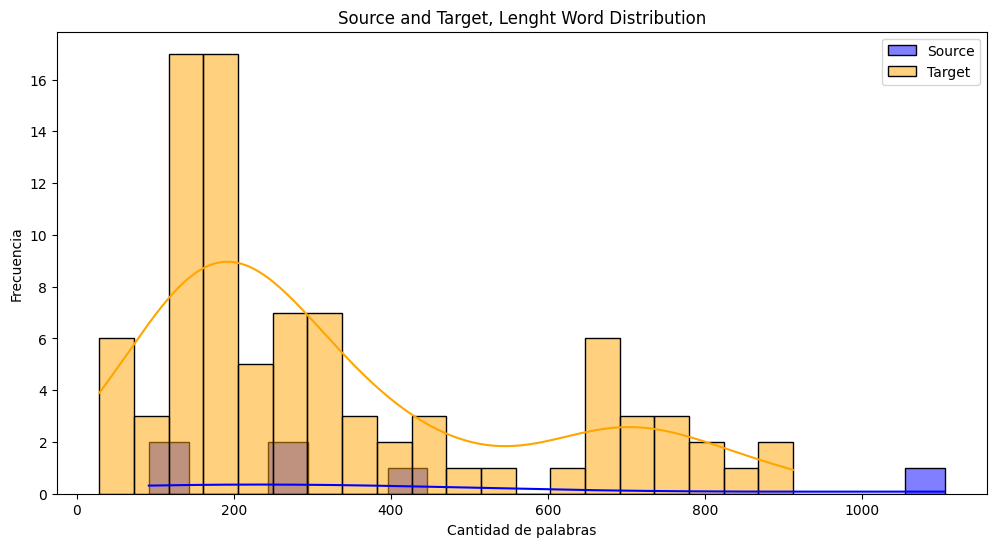

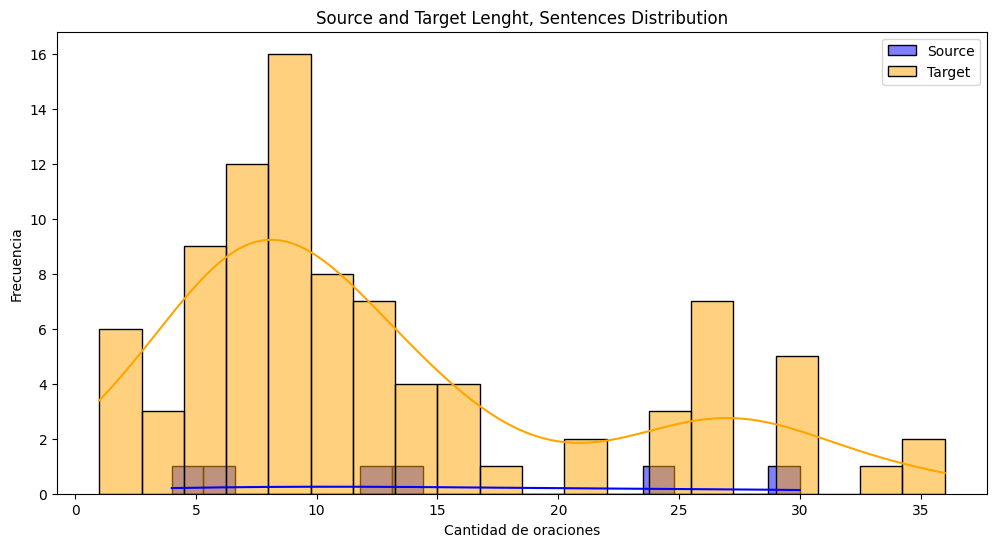

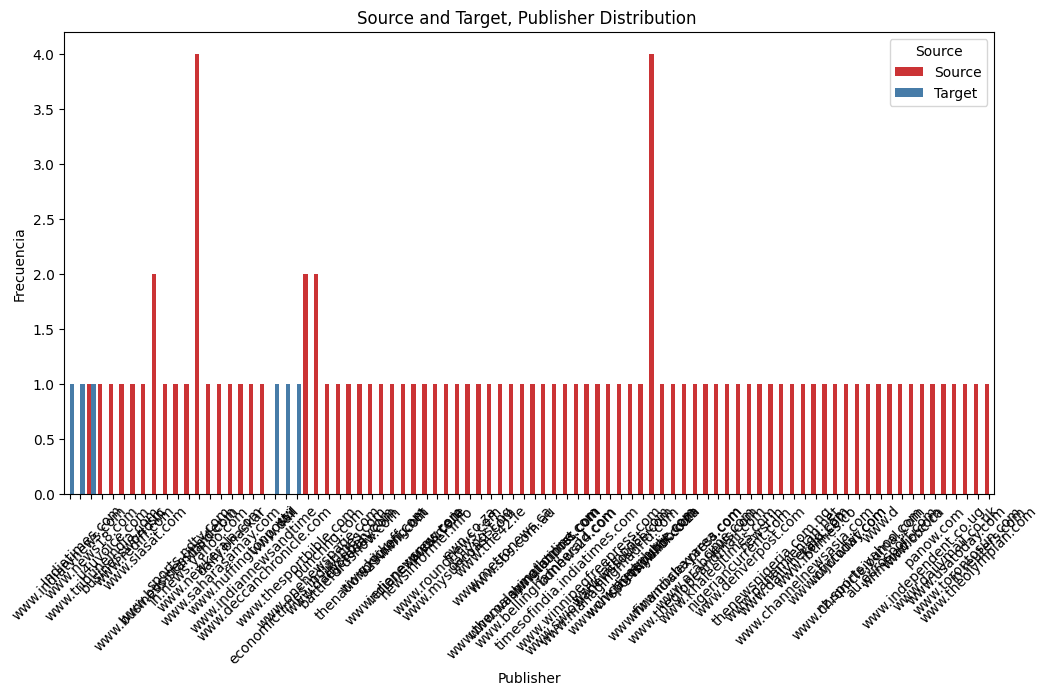

In [14]:
from Exploratory_Analysis.variable_distribution import len_words_distribution, count_sentences_distribution, publisher_distribution
print(len(df_source),len(df_target))
len_words_distribution(df_source, df_target )
count_sentences_distribution(df_source, df_target )
publisher_distribution(df_news)

**Analysis Summary:**

- The word count and sentence count distributions show distinct patterns between `source` and `target`, suggesting structural differences that could be useful for novelty detection.
- The `publisher` feature shows minimal repetition and likely introduces noise, so it may be better to exclude it. This feature could introduce noise because the model may think that a new article from a new publisher is associated with novelty. However, in this case, the dataset doesn't have titles for all of the articles, so we can't combine the title and article as a feature. Therefore, it's better to use only the corpus to identify novelty based on the content.

**Next Steps:**
- Extract word and sentence count as additional features to analise if that could be interesting in our analise (PCA).
- Explore other text features like keyword frequency.

###  Principal Component Analises (PCA)
-  PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data. Se below how the original variables are now transformed into the same number of components.

In [15]:
from Exploratory_Analysis.pca import pca_analises
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler

- Selecting Characteristics for Analysis

In [16]:
# Eliminar filas donde 'DLA' es NaN
df_news = df_news[df_news['DLA'].notna()]

# Convertir valores de 'DLA' a 1 para "Novel" y 0 para "Non-Novel"
df_news['DLA'] = df_news['DLA'].apply(lambda x: 1 if x == 'Novel' else 0)

# Seleccionar las características para PCA
features = ['sentence', 'words', 'DLA']

# Convertir las columnas especificadas a tipo float
df_news[features] = df_news[features].astype(float)

* Normalizing Data

In [17]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_news[features])

**Box Plot Analysis after Normalizing Data**

<Axes: >

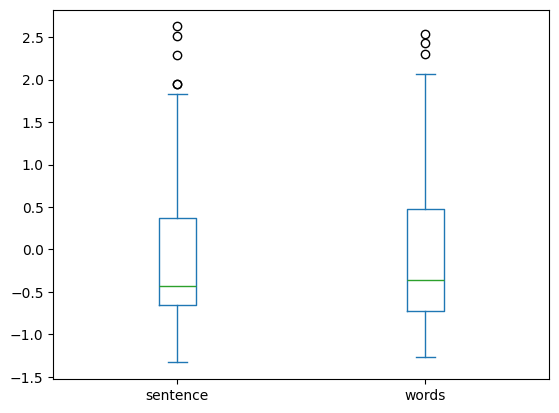

In [18]:
df_normalized = pd.DataFrame(X_normalized, columns=features)

df_normalized[['sentence', 'words']].plot.box()

- The boxplot shows that both sentence and words features are centered around the mean with similar variability, and both contain some outliers, indicating articles with higher word or sentence counts. 
- **These outliers could potentially be associated with novel content, making them worth further investigation.**

         PC1       PC2       PC3
0   0.557563  1.012350  0.164879
1   0.256670  1.183592  0.025779
2   0.888078  0.810254  0.109409
3  -0.092035  1.397999  0.101998
4   0.567956  1.005315  0.153023
..       ...       ...       ...
85 -0.533252 -0.710919 -0.139722
86 -1.343950 -0.216231 -0.018830
87 -1.106977 -0.355014  0.032407
88  2.451269 -0.128922  0.094801
89  2.451269 -0.128922  0.094801

[90 rows x 3 columns]


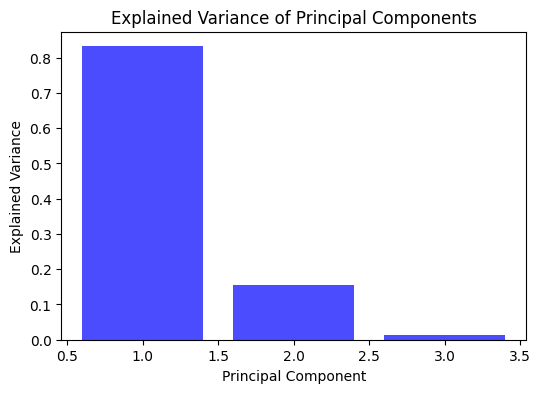


               PC1       PC2
sentence  0.611273 -0.318175
words     0.601997 -0.407455
DLA       0.513756  0.856005


In [19]:
df_pca = pca_analises(X_normalized,features)

- **The first component** captures approximately **80%** of the variance, it is recommended to use only the first component and discard the original features, at least as an initial test. This approach would reduce dimensionality and could simplify the model without losing much information.

In [20]:
df_news

is_source             publisher                         eventname  \
3       False  www.tribuneindia.com   Baba Ramdev wrestling challenge   
4       False          u4uvoice.com   Baba Ramdev wrestling challenge   
5       False      businessworld.in   Baba Ramdev wrestling challenge   
6       False        www.rediff.com   Baba Ramdev wrestling challenge   
7       False        www.siasat.com   Baba Ramdev wrestling challenge   
..        ...                   ...                               ...   
91      False      sports.yahoo.com  Ronaldo wins FIFA's player award   
92      False   www.theolympian.com  Ronaldo wins FIFA's player award   
93      False        in.reuters.com  Ronaldo wins FIFA's player award   
94      False     in.news.yahoo.com  Ronaldo wins FIFA's player award   
95      False      sports.yahoo.com  Ronaldo wins FIFA's player award   

    sentence  words  DLA   SLNS  \
3       14.0  279.0  1.0  66.07   
4       11.0  243.0  1.0  54.55   
5       16.0  353.0  1.0  79.41   
6        9.0  162.0  1.0  77.78   
7       14.0  283.0  1.0  69.23   
..       ...    ...  ...    ...   
91      11.0  338.0  0.0  43.18   
92       6.0  159.0  0.0  45.83   
93       8.0  197.0  0.0  25.00   
94      27.0  662.0  1.0  75.00   
95      27.0  662.0  1.0  79.63   

                                        content_no_sw  
3   yoga guru baba ramdev display wrestling skill ...  
4   yoga guru baba ramdev display wrestling skill ...  
5   cloud baba ramdev beats olympian wrestler andr...  
6   win friendly bout olympic silver medallist and...  
7   yoga guru baba ramdev display wrestling skill ...  
..                                                ...  
91  cristiano ronaldo best fifa male player year u...  
92  portugal cristiano ronaldo celebrate trophy en...  
93  italian claudio ranieri coach year award lead ...  
94  cristiano ronaldo receive fifa good player awa...  
95  cristiano ronaldo receive fifa good player awa...  

[90 rows x 8 columns]

In [21]:
df_pca

PC1       PC2       PC3
0   0.557563  1.012350  0.164879
1   0.256670  1.183592  0.025779
2   0.888078  0.810254  0.109409
3  -0.092035  1.397999  0.101998
4   0.567956  1.005315  0.153023
..       ...       ...       ...
85 -0.533252 -0.710919 -0.139722
86 -1.343950 -0.216231 -0.018830
87 -1.106977 -0.355014  0.032407
88  2.451269 -0.128922  0.094801
89  2.451269 -0.128922  0.094801

[90 rows x 3 columns]

In [22]:
# Restablecer los índices de ambos DataFrames
df_news.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

df_news = pd.merge(df_news, df_pca[['PC1']], left_index=True, right_index=True, how='left')

print(df_news.columns)
print(df_news.shape)

Index(['is_source', 'publisher', 'eventname', 'sentence', 'words', 'DLA',
       'SLNS', 'content_no_sw', 'PC1'],
      dtype='object')
(90, 9)


**Latent Semantic Analysis (LSA)**
- technique  that helps to uncover the hidden (latent) relationships between words in a large corpus of text.
- Analysis of Variance in Text Data:
Evaluating the variance of extracted text features (such as TF-IDF or embeddings) can indicate how diverse the content is within source and target. If target shows greater variance, this could support the hypothesis that it contains novel information.

In [23]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import nltk

# Descargar datos necesarios para tokenización de NLTK si es necesario
nltk.download('punkt')

# Supongamos que df_news['content_no_sw'] ya contiene el texto sin palabras vacías

# Paso 1: Tokenizar cada documento en 'content_no_sw'
df_news['tokens'] = df_news['content_no_sw'].apply(word_tokenize)

# Paso 2: Crear un diccionario de palabras
dictionary = corpora.Dictionary(df_news['tokens'])

# Paso 3: Filtrar palabras poco frecuentes y demasiado comunes
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Paso 4: Convertir los documentos a la representación de bolsa de palabras (bag-of-words)
corpus = [dictionary.doc2bow(text) for text in df_news['tokens']]

# Paso 5: Entrenar el modelo LDA
num_topics = 5  # Número de temas
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Mostrar los temas generados
print("Temas generados por LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Paso 6: Obtener la distribución de temas para cada documento y agregarla al DataFrame
topic_distributions = []

for doc in corpus:
    topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
    # Convertir la distribución en un diccionario para facilitar el acceso
    topic_dist_dict = {f"topic_{i}": prob for i, prob in topic_dist}
    topic_distributions.append(topic_dist_dict)

# Crear un DataFrame con las distribuciones de temas
df_topics = pd.DataFrame(topic_distributions)

# Concatenar las distribuciones de temas con el DataFrame original
df_news = pd.concat([df_news, df_topics], axis=1)

# Visualizar el dataset estructurado con las distribuciones de temas
print("DataFrame estructurado con distribuciones de temas:")
print(df_news.head())


[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Temas generados por LDA:
Topic 1: 0.056*"see" + 0.024*"ballon" + 0.018*"end" + 0.017*"fourth" + 0.011*"crown" + 0.010*"name" + 0.010*"despite" + 0.010*"atletico" + 0.010*"championship" + 0.009*"best"
Topic 2: 0.030*"ballon" + 0.029*"game" + 0.028*"infantino" + 0.026*"lead" + 0.026*"city" + 0.024*"euro" + 0.024*"president" + 0.023*"old" + 0.023*"gianni" + 0.022*"month"
Topic 3: 0.020*"team" + 0.018*"fan" + 0.017*"prize" + 0.016*"winner" + 0.013*"germany" + 0.013*"captain" + 0.012*"atletico" + 0.012*"cup" + 0.011*"lloyd" + 0.011*"fourth"
Topic 4: 0.054*"nominee" + 0.053*"monday" + 0.053*"soccer" + 0.051*"match" + 0.041*"ball" + 0.037*"de" + 0.033*"argentina" + 0.033*"cup" + 0.022*"celebrate" + 0.018*"kick"
Topic 5: 0.059*"ramdev" + 0.048*"wrestling" + 0.038*"bout" + 0.034*"stadnik" + 0.034*"baba" + 0.023*"yoga" + 0.022*"sushil" + 0.019*"olympic" + 0.017*"show" + 0.015*"promotional"
DataFrame estructurado con distribuciones de temas:
   is_source             publisher                     

**Calculate Correlation and Dimensionality Reduction**

### Models

In [24]:
# Preparar los datos de entrenamiento y prueba a partir de `df_news`
X_train = df_news[df_news['is_source'] == True]['content_no_sw'].astype(str)  # Solo datos de `source`
X_test = df_news[df_news['is_source'] == False]['content_no_sw'].astype(str)  # Solo datos de `target`